In [1]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [18]:
import umap

/Users/radmajik/anaconda3/envs/tsp/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [17]:
sns.set(context='notebook', style='white', rc={'figure.figsize':(14,10)})


/Users/radmajik/anaconda3/envs/tsp/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/var/folders/ww/zmy65s114cv2_jtlds20mdzc0000gn/T/ipykernel_55128/4233013917.py:16: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(embedding[:, 0], embedding[:, 1], s=5, cmap='Spectral')


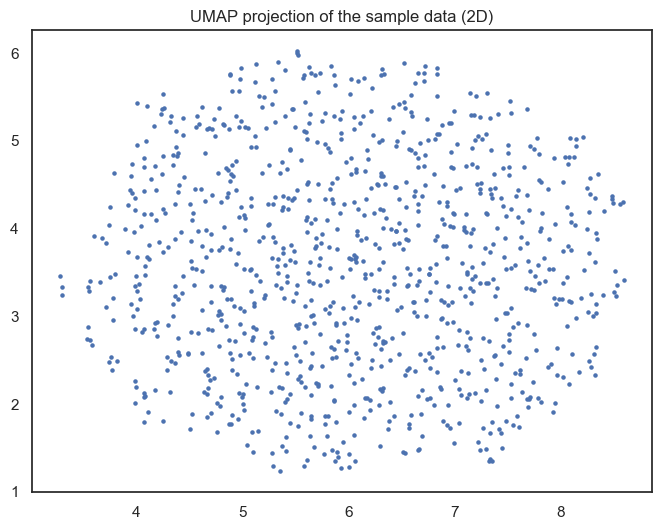

In [19]:
# Example: Assume data is a NumPy array or pandas DataFrame
def visualize_umap_sample(data, sample_size=1000, random_state=42, n_neighbors=15, min_dist=0.1, n_components=2):
    # Step 1: Take a random sample from the data
    if isinstance(data, np.ndarray):
        sampled_data = data[np.random.choice(data.shape[0], size=sample_size, replace=False)]
    else:
        sampled_data = data.sample(n=sample_size, random_state=random_state)
    
    # Step 2: Fit UMAP on the sampled data
    reducer = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist, n_components=n_components, random_state=random_state)
    embedding = reducer.fit_transform(sampled_data)
    
    # Step 3: Visualize the embedding
    plt.figure(figsize=(8, 6))
    if n_components == 2:
        plt.scatter(embedding[:, 0], embedding[:, 1], s=5, cmap='Spectral')
        plt.title('UMAP projection of the sample data (2D)')
    elif n_components == 3:
        ax = plt.axes(projection='3d')
        ax.scatter(embedding[:, 0], embedding[:, 1], embedding[:, 2], s=5, cmap='Spectral')
        plt.title('UMAP projection of the sample data (3D)')
    
    plt.show()

# Example usage with a random dataset
data = np.random.rand(10000, 50)  # Example data with 10,000 rows and 50 features
visualize_umap_sample(data, sample_size=1000, n_neighbors=15, min_dist=0.1, n_components=2)

In [2]:
import pandas as pd
import numpy as np

In [3]:
import pickle as pkl
import os

In [4]:
import os
import numpy as np

def load_and_concatenate_npy_with_indices(file_list):
    arrays = []
    metadata = []
    current_index = 0  

    for file in file_list:
        array = np.load('./data/sign_flip/' + file, allow_pickle=True)
        arrays.append(array)
        
        start_index = current_index
        end_index = start_index + array.shape[0]  
        current_index = end_index 

        file_metadata = {
            'filename': os.path.basename(file),
            'shape': array.shape,
            'dtype': array.dtype,
            'start_index': start_index,
            'end_index': end_index
        }
        metadata.append(file_metadata)
    
    concatenated_array = np.concatenate(arrays, axis=0)
    
    return concatenated_array, metadata

file_list = [x for x in os.listdir('./data/sign_flip/') if x.endswith(".npy")] 
import re

def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    '''
    alist.sort(key=natural_keys) sorts in human order
    http://nedbatchelder.com/blog/200712/human_sorting.html
    (See Toothy's implementation in the comments)
    '''
    return [ atoi(c) for c in re.split(r'(\d+)', text) ]

file_list.sort(key=natural_keys)

concatenated_array, metadata = load_and_concatenate_npy_with_indices(file_list)

print("Concatenated array shape:", concatenated_array.shape)
print("Metadata with indices:", metadata)


Concatenated array shape: (2031616, 50, 2)
Metadata with indices: [{'filename': 'epoch-0_data.npy', 'shape': (65536, 50, 2), 'dtype': dtype('float32'), 'start_index': 0, 'end_index': 65536}, {'filename': 'epoch-5_data.npy', 'shape': (65536, 50, 2), 'dtype': dtype('float32'), 'start_index': 65536, 'end_index': 131072}, {'filename': 'epoch-10_data.npy', 'shape': (65536, 50, 2), 'dtype': dtype('float32'), 'start_index': 131072, 'end_index': 196608}, {'filename': 'epoch-15_data.npy', 'shape': (65536, 50, 2), 'dtype': dtype('float32'), 'start_index': 196608, 'end_index': 262144}, {'filename': 'epoch-20_data.npy', 'shape': (65536, 50, 2), 'dtype': dtype('float32'), 'start_index': 262144, 'end_index': 327680}, {'filename': 'epoch-25_data.npy', 'shape': (65536, 50, 2), 'dtype': dtype('float32'), 'start_index': 327680, 'end_index': 393216}, {'filename': 'epoch-30_data.npy', 'shape': (65536, 50, 2), 'dtype': dtype('float32'), 'start_index': 393216, 'end_index': 458752}, {'filename': 'epoch-35_da

In [ ]:
# This object stores the epochs:
metadata

In [5]:
# Mean center along the 50 points for each array
mean_centers = np.mean(concatenated_array, axis=1) 

# Median center along the 50 points for each array
median_centers = np.median(concatenated_array, axis=1) 

# Standard deviation of points in each 2D array
std_devs = np.std(concatenated_array, axis=1) 

In [6]:
from scipy.spatial import KDTree

def compute_mean_nearest_neighbor(points):
    tree = KDTree(points)
    distances, _ = tree.query(points, k=2) 
    return np.mean(distances[:, 1])

mean_nearest_neighbors = np.array([compute_mean_nearest_neighbor(concatenated_array[i]) for i in range(concatenated_array.shape[0])])

In [7]:
from scipy.spatial import ConvexHull

def compute_convex_hull_area(points):
    hull = ConvexHull(points)
    return hull.volume  # In 2D, this gives the area of the convex hull

convex_hull_areas = np.array([compute_convex_hull_area(concatenated_array[i]) for i in range(concatenated_array.shape[0])])

In [8]:
from sklearn.cluster import DBSCAN
concatenated_array[1].shape

(50, 2)

In [9]:
from collections import Counter

In [10]:
n_clusters = []
cluster_size_variances = []
for i in range(concatenated_array.shape[0]):
    clustering = DBSCAN(eps=.1, min_samples=2).fit(concatenated_array[i])
    labels = clustering.labels_
    counts = Counter(labels)
    values = list(counts.keys())
    frequencies = list(counts.values())
    total_count = sum(frequencies)  

    # Calculate the weighted mean
    mean = sum(value * freq for value, freq in counts.items()) / total_count

    # Calculate variance
    variance = sum(freq * (value - mean) ** 2 for value, freq in counts.items()) / total_count


    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    cluster_size_variances.append(variance)
    n_clusters.append(n_clusters_)

In [11]:
x_mean_center_epochs = []
y_mean_center_epochs = []
x_std_dev_epochs = []
y_std_dev_epochs = []
hull_area_epochs = []
mean_mean_nearest_neighbor_distance_epochs = []
n_clusters_epochs = []
cluster_size_variances_epochs = []
for key in metadata:
    print(key['filename'], key['shape'])
    start = key['start_index']
    end = key['end_index']
    x_mean_center = np.mean(mean_centers[start:end,0])
    y_mean_center = np.mean(mean_centers[start:end,1])
    x_std_dev = np.mean(std_devs[start:end,0])
    y_std_dev = np.mean(std_devs[start:end,1])
    hull_area = np.mean(convex_hull_areas[start:end])
    n_clusters_mean = np.mean(n_clusters[start:end])
    variance_mean = np.mean(cluster_size_variances[start:end])
    mean_mean_nearest_neighbor_distance = np.mean(mean_nearest_neighbors[start:end])

    print("\t", "x_mean_center:", x_mean_center)
    print("\t", "y_mean_center:", y_mean_center)
    print("\t", "x_std_dev:", x_std_dev)
    print("\t", "y_std_dev:", y_std_dev)
    print("\t", "hull_area:", hull_area)
    print("\t", "mean_mean_nearest_neighbor_distance:", mean_mean_nearest_neighbor_distance)
    print("\t", "n_clusters:", n_clusters_mean)
    print("\t", "cluster_size_variances:", variance_mean)

    x_mean_center_epochs.append(x_mean_center)
    y_mean_center_epochs.append(y_mean_center)
    x_std_dev_epochs.append(x_std_dev)
    y_std_dev_epochs.append(y_std_dev)
    hull_area_epochs.append(hull_area)
    mean_mean_nearest_neighbor_distance_epochs.append(mean_mean_nearest_neighbor_distance)
    n_clusters_epochs.append(n_clusters_mean)
    cluster_size_variances_epochs.append(variance_mean)

epoch-0_data.npy (65536, 50, 2)
	 x_mean_center: 0.4900455
	 y_mean_center: 0.5053633
	 x_std_dev: 0.22686185
	 y_std_dev: 0.22714794
	 hull_area: 0.6535608634198761
	 mean_mean_nearest_neighbor_distance: 0.06550918098009818
	 n_clusters: 5.9964447021484375
	 cluster_size_variances: 3.9903344055175776
epoch-5_data.npy (65536, 50, 2)
	 x_mean_center: 0.49548233
	 y_mean_center: 0.49916416
	 x_std_dev: 0.22165109
	 y_std_dev: 0.22329363
	 hull_area: 0.6476863535522132
	 mean_mean_nearest_neighbor_distance: 0.06471736355014336
	 n_clusters: 5.6325836181640625
	 cluster_size_variances: 3.5734975341796877
epoch-10_data.npy (65536, 50, 2)
	 x_mean_center: 0.48632482
	 y_mean_center: 0.5042699
	 x_std_dev: 0.22455615
	 y_std_dev: 0.22217833
	 hull_area: 0.645122393485118
	 mean_mean_nearest_neighbor_distance: 0.06464810437516304
	 n_clusters: 5.6493072509765625
	 cluster_size_variances: 3.589348468017578
epoch-15_data.npy (65536, 50, 2)
	 x_mean_center: 0.496119
	 y_mean_center: 0.50066626
	 

In [12]:
series = {"x_mean_center_epochs": {"epochs": [x*5 for x in range(31)], "data": x_mean_center_epochs},
          "y_mean_center_epochs": {"epochs": [x*5 for x in range(31)], "data": y_mean_center_epochs},
          "x_std_dev_epochs": {"epochs": [x*5 for x in range(31)], "data": x_std_dev_epochs},
          "y_std_dev_epochs": {"epochs": [x*5 for x in range(31)], "data": y_std_dev_epochs},
          "hull_area_epochs": {"epochs": [x*5 for x in range(31)], "data": hull_area_epochs},
          "mean_mean_nearest_neighbor_distance_epochs": {"epochs": [x*5 for x in range(31)], "data": mean_mean_nearest_neighbor_distance_epochs},
          "n_clusters_epochs": {"epochs": [x*5 for x in range(31)] ,"data": n_clusters_epochs},
          "cluster_size_variances_epochs": {"epochs": [x*5 for x in range(31)], "data": cluster_size_variances_epochs}} 


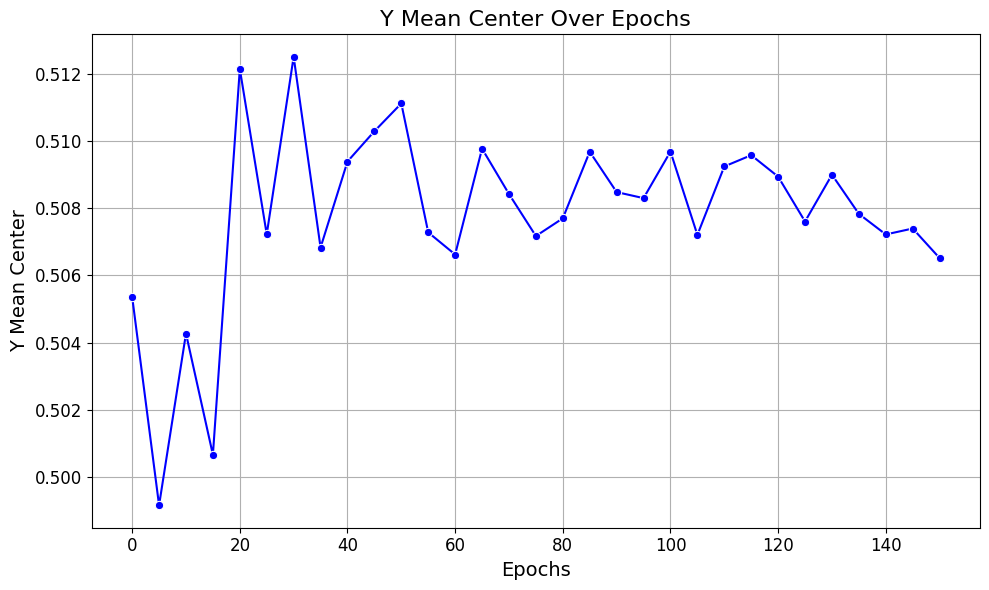

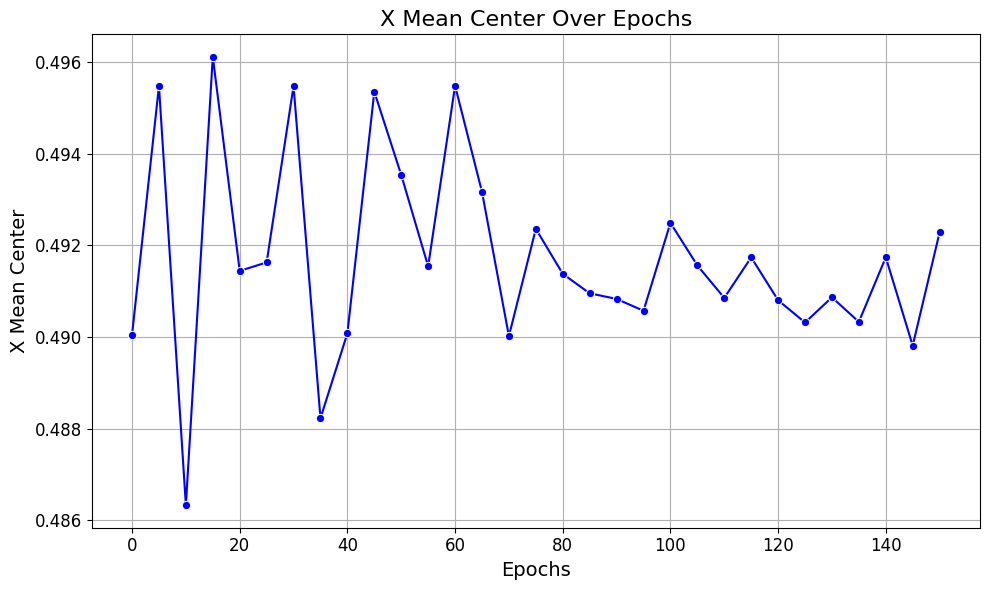

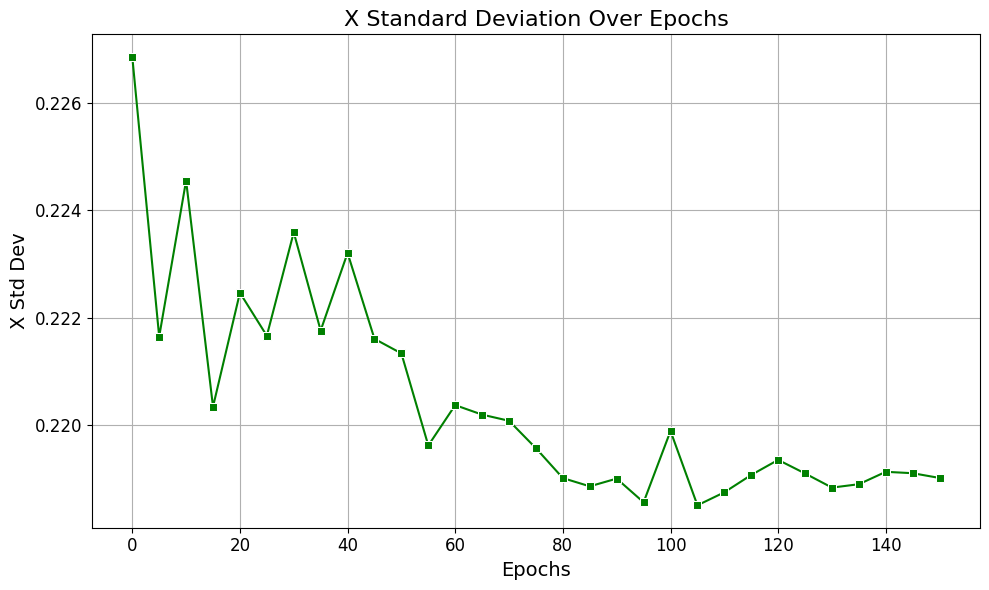

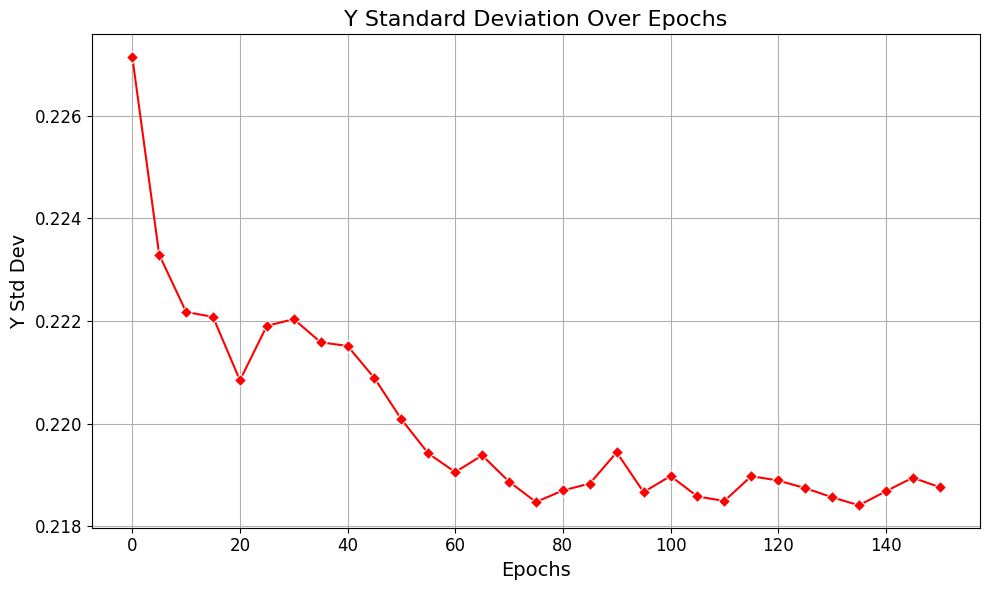

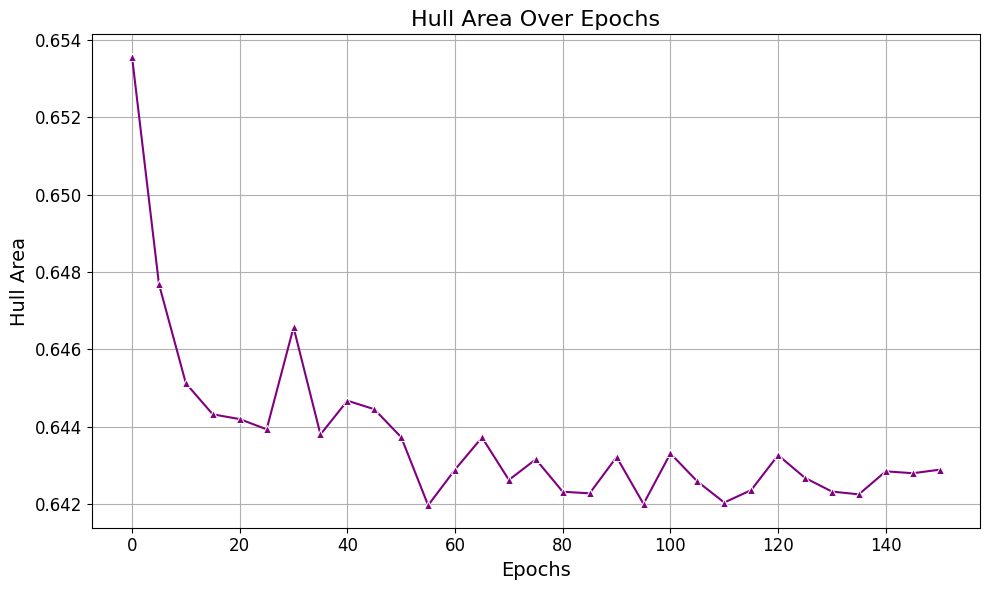

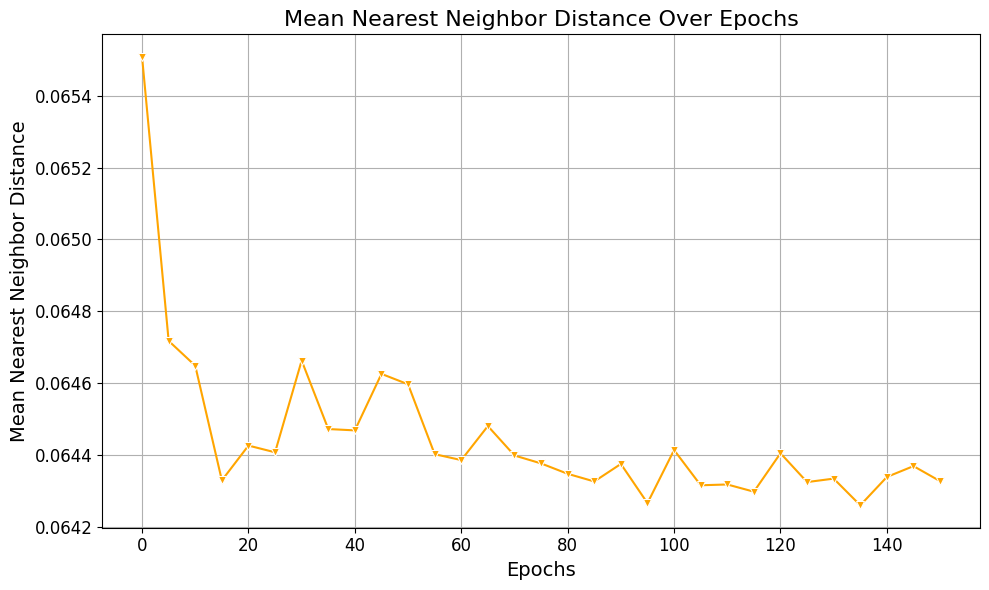

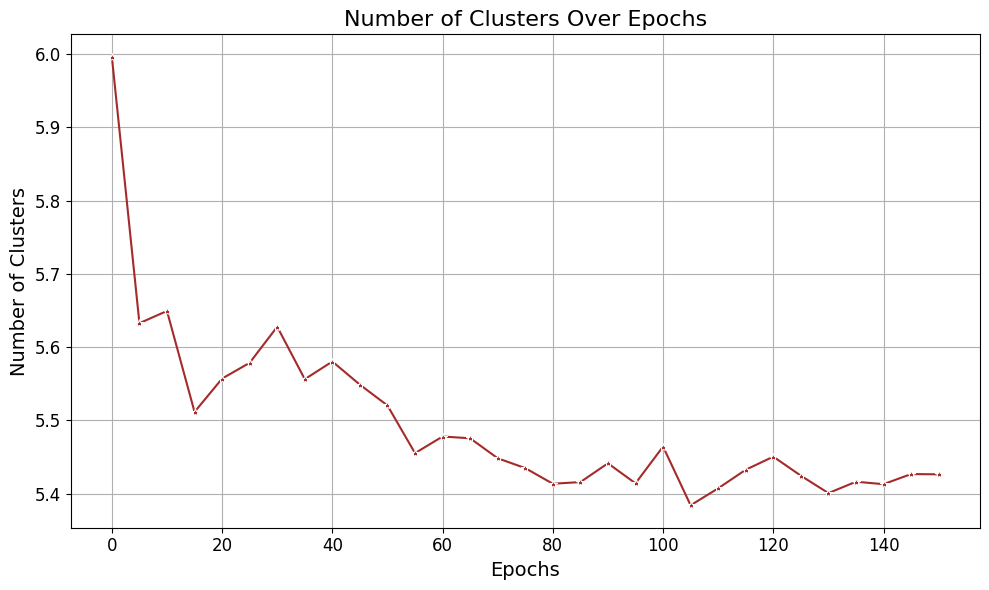

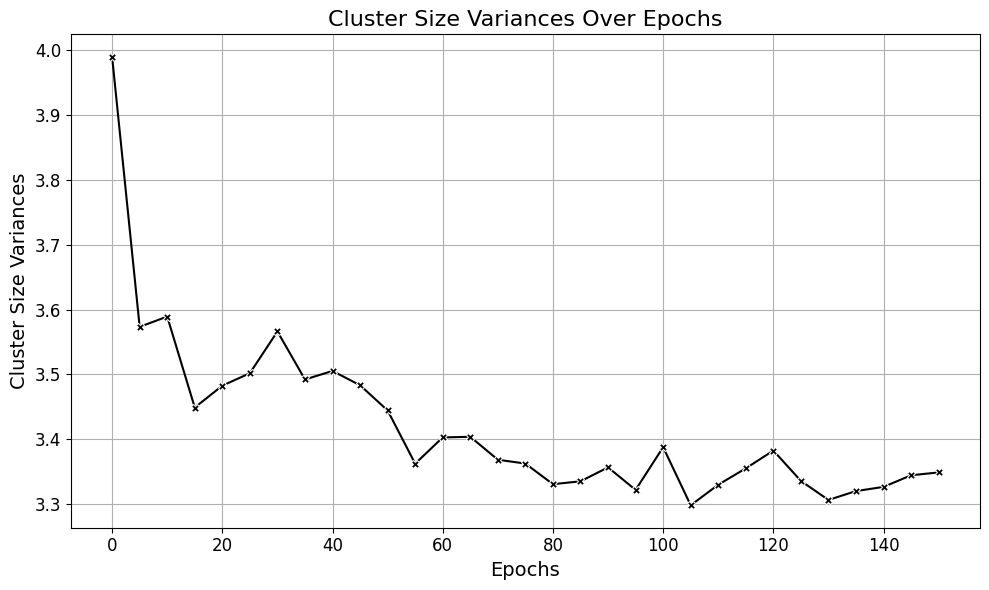

In [15]:
epochs = [x * 5 for x in range(31)]

def plot_metric(epochs, data, title, ylabel, color, marker, filename):
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=epochs, y=data, marker=marker, color=color) 
    plt.title(f'{title}', fontsize=16)
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel(f'{ylabel}', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(filename) 
    plt.show()


# 1. Y Mean Center
plot_metric(epochs, y_mean_center_epochs, 'Y Mean Center Over Epochs', 'Y Mean Center', 'blue', 'o', 'y_mean_center_epochs.png')

# 2. X Mean Center
plot_metric(epochs, x_mean_center_epochs, 'X Mean Center Over Epochs', 'X Mean Center', 'blue', 'o', 'x_mean_center_epochs.png')

# 3. X Standard Deviation
plot_metric(epochs, x_std_dev_epochs, 'X Standard Deviation Over Epochs', 'X Std Dev', 'green', 's', 'x_std_dev_epochs.png')

# 4. Y Standard Deviation
plot_metric(epochs, y_std_dev_epochs, 'Y Standard Deviation Over Epochs', 'Y Std Dev', 'red', 'D', 'y_std_dev_epochs.png')

# 5. Hull Area
plot_metric(epochs, hull_area_epochs, 'Hull Area Over Epochs', 'Hull Area', 'purple', '^', 'hull_area_epochs.png')

# 6. Mean Nearest Neighbor Distance
plot_metric(epochs, mean_mean_nearest_neighbor_distance_epochs, 'Mean Nearest Neighbor Distance Over Epochs', 'Mean Nearest Neighbor Distance', 'orange', 'v', 'mean_mean_nearest_neighbor_distance_epochs.png')

# 7. Number of Clusters
plot_metric(epochs, n_clusters_epochs, 'Number of Clusters Over Epochs', 'Number of Clusters', 'brown', '*', 'n_clusters_epochs.png')

# 8. Cluster Size Variances
plot_metric(epochs, cluster_size_variances_epochs, 'Cluster Size Variances Over Epochs', 'Cluster Size Variances', 'black', 'X', 'cluster_size_variances_epochs.png')

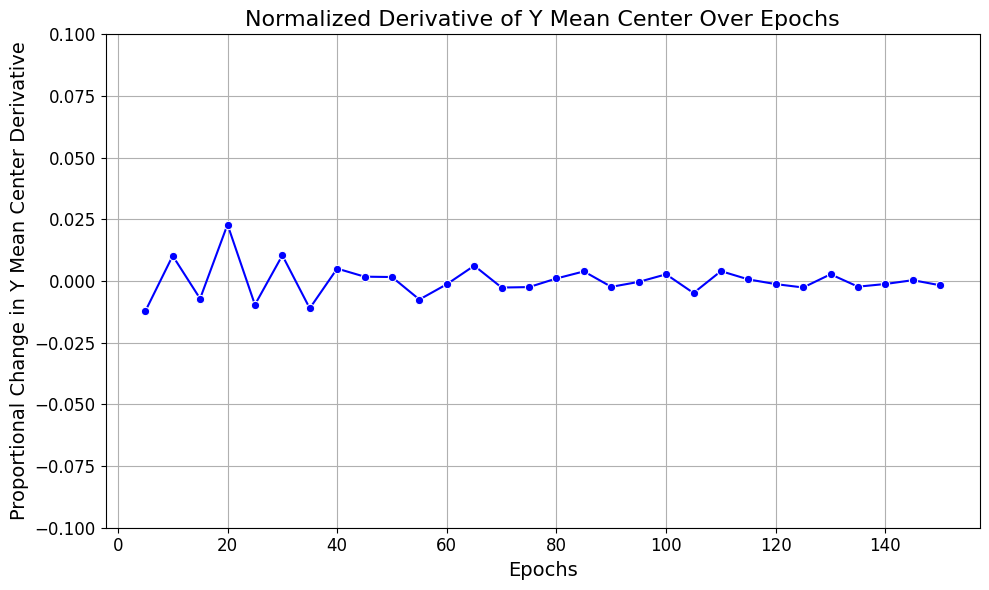

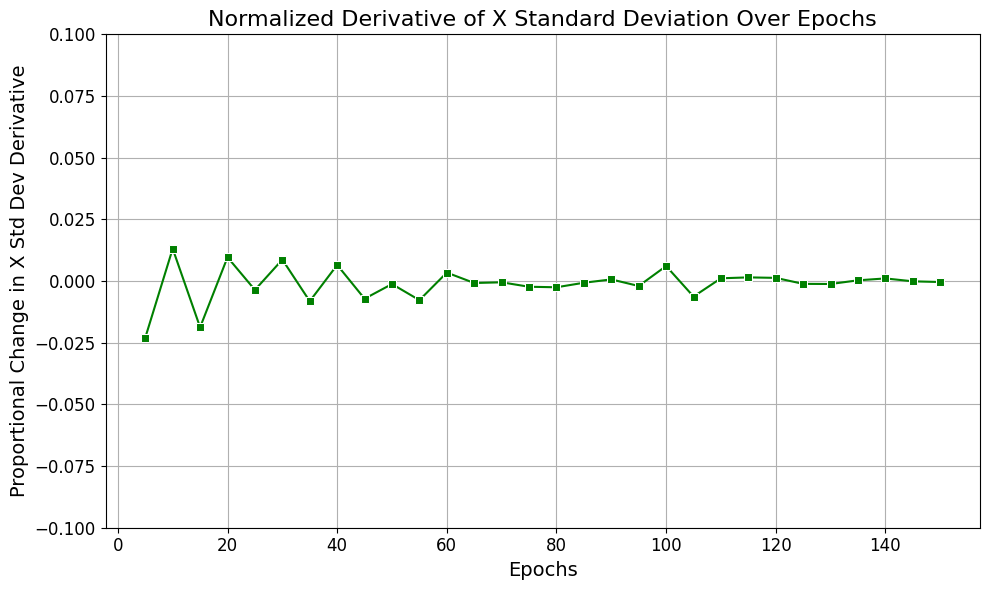

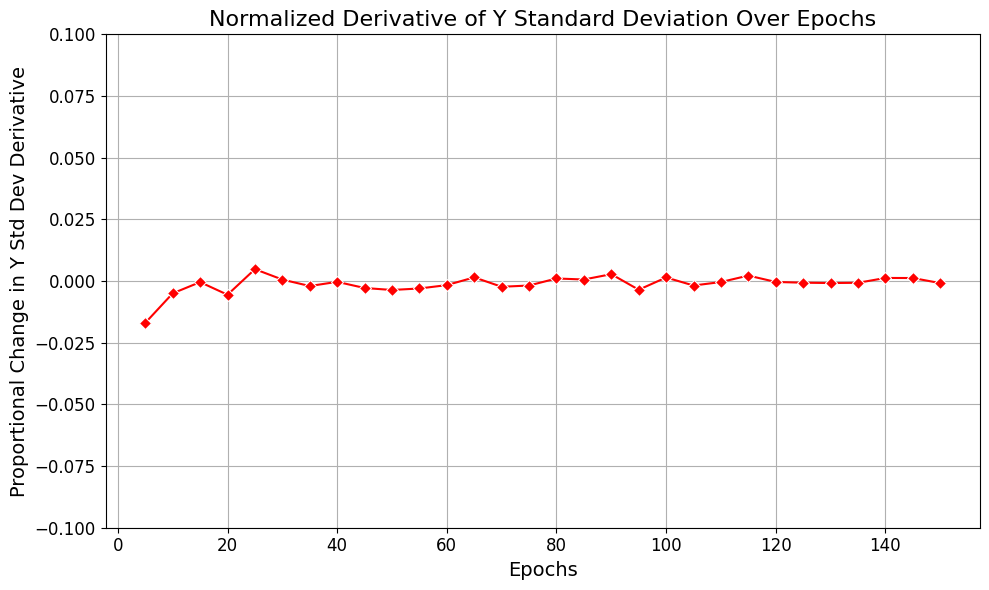

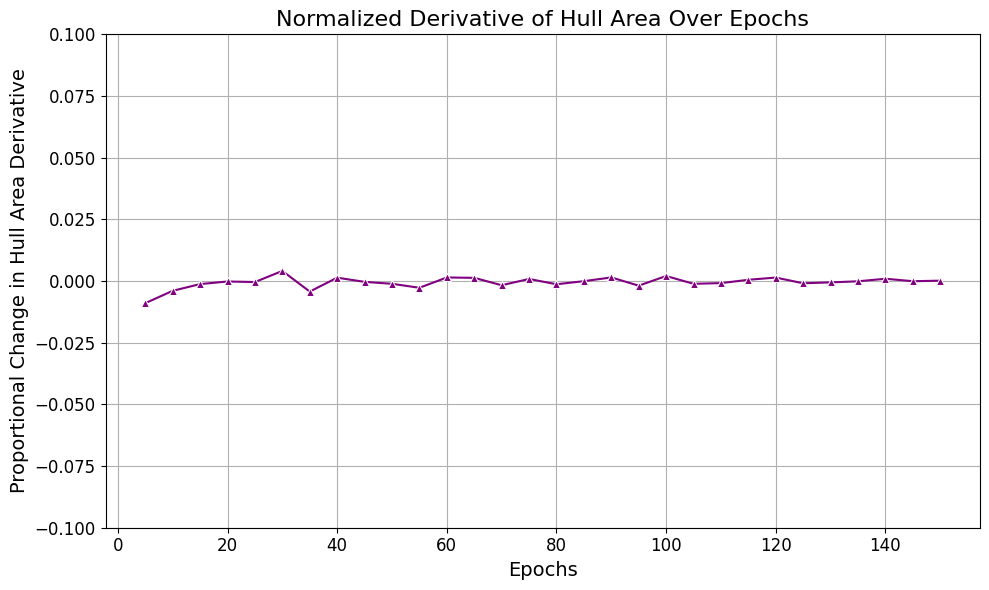

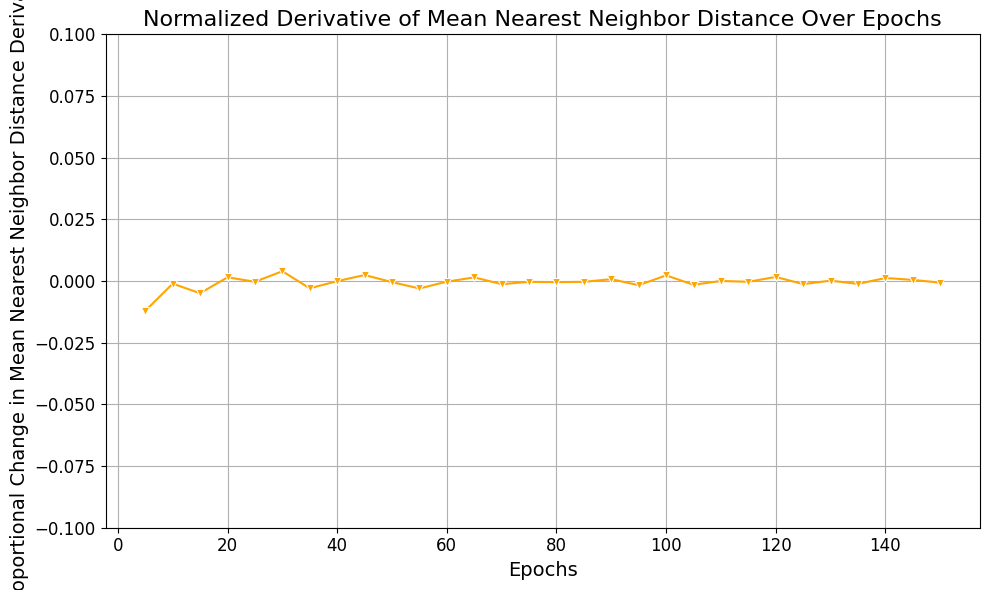

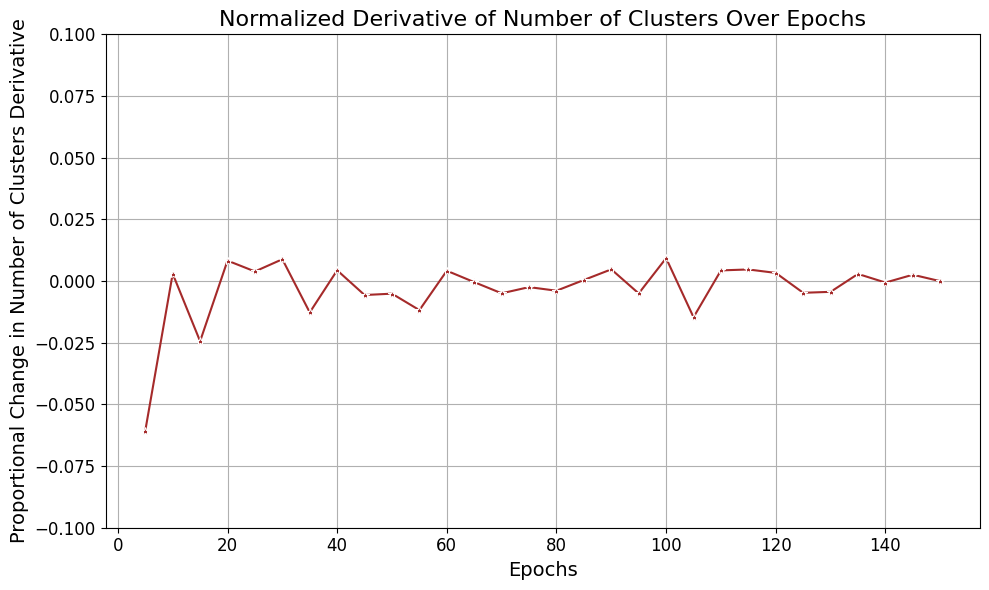

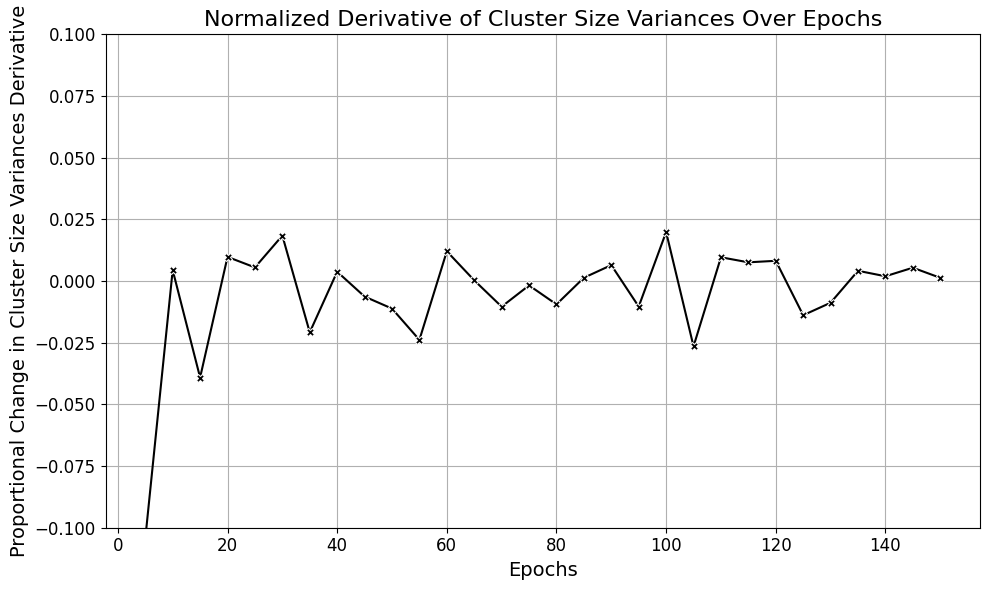

In [16]:
# Shared epochs (x-axis values)
epochs = [x * 5 for x in range(31)]

# Function to plot the normalized derivative with fixed y-axis limits (0 to 1)
def plot_metric_derivative(epochs, data, title, ylabel, color, marker, filename):
    derivative = np.diff(data) 
    perc_change = derivative/data[:-1] 
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=epochs[1:], y=perc_change, marker=marker, color=color) 
    plt.title(f'Normalized Derivative of {title}', fontsize=16)
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel(f'Proportional Change in {ylabel}', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.ylim(-.1, .1) 
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(filename)  
    plt.show()

# Plot each individual normalized derivative metric with fixed y-axis limits

# 1. Y Mean Center
plot_metric_derivative(epochs, y_mean_center_epochs, 'Y Mean Center Over Epochs', 'Y Mean Center Derivative', 'blue', 'o', 'y_mean_center_epochs_derivative.png')

# 2. X Mean Center
plot_metric_derivative(epochs, x_mean_center_epochs, 'X Mean Center Over Epochs', 'X Mean Center Derivative', 'blue', 'o', 'x_mean_center_epochs_derivative.png')

# 3. X Standard Deviation
plot_metric_derivative(epochs, x_std_dev_epochs, 'X Standard Deviation Over Epochs', 'X Std Dev Derivative', 'green', 's', 'x_std_dev_epochs_derivative.png')

# 4. Y Standard Deviation
plot_metric_derivative(epochs, y_std_dev_epochs, 'Y Standard Deviation Over Epochs', 'Y Std Dev Derivative', 'red', 'D', 'y_std_dev_epochs_derivative.png')

# 5. Hull Area
plot_metric_derivative(epochs, hull_area_epochs, 'Hull Area Over Epochs', 'Hull Area Derivative', 'purple', '^', 'hull_area_epochs_derivative.png')

# 6. Mean Nearest Neighbor Distance
plot_metric_derivative(epochs, mean_mean_nearest_neighbor_distance_epochs, 'Mean Nearest Neighbor Distance Over Epochs', 'Mean Nearest Neighbor Distance Derivative', 'orange', 'v', 'mean_mean_nearest_neighbor_distance_epochs_derivative.png')

# 7. Number of Clusters
plot_metric_derivative(epochs, n_clusters_epochs, 'Number of Clusters Over Epochs', 'Number of Clusters Derivative', 'brown', '*', 'n_clusters_epochs_derivative.png')

# 8. Cluster Size Variances
plot_metric_derivative(epochs, cluster_size_variances_epochs, 'Cluster Size Variances Over Epochs', 'Cluster Size Variances Derivative', 'black', 'X', 'cluster_size_variances_epochs_derivative.png')

In [21]:
def combine_dims(a, start=0, count=2):
    """ Reshapes numpy array a by combining count dimensions, 
        starting at dimension index start """
    s = a.shape
    return np.reshape(a, s[:start] + (-1,) + s[start+count:])

In [ ]:
reshaped_data = combine_dims(concatenated_array, 1,2)

In [ ]:
import umap
trans = umap.UMAP(n_neighbors=5, random_state=42).fit(reshaped_data)

/Users/radmajik/anaconda3/envs/srl_proj/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [ ]:
# with pickle
import pickle

f_name = './data/data/umap.pkl'
pickle.dump((trans, metadata, reshaped_data), open(f_name, 'wb'))

# time passes
#loaded_model = pickle.load((open(f_name, 'rb')))
#print(type(loaded_model))
# <class 'umap.umap_.UMAP'>

In [ ]:
sample_10k = np.random.choice(reshaped_data.shape[0], size=50000, replace=False)

Text(0.5, 1.0, 'Embedding of the training set by UMAP')

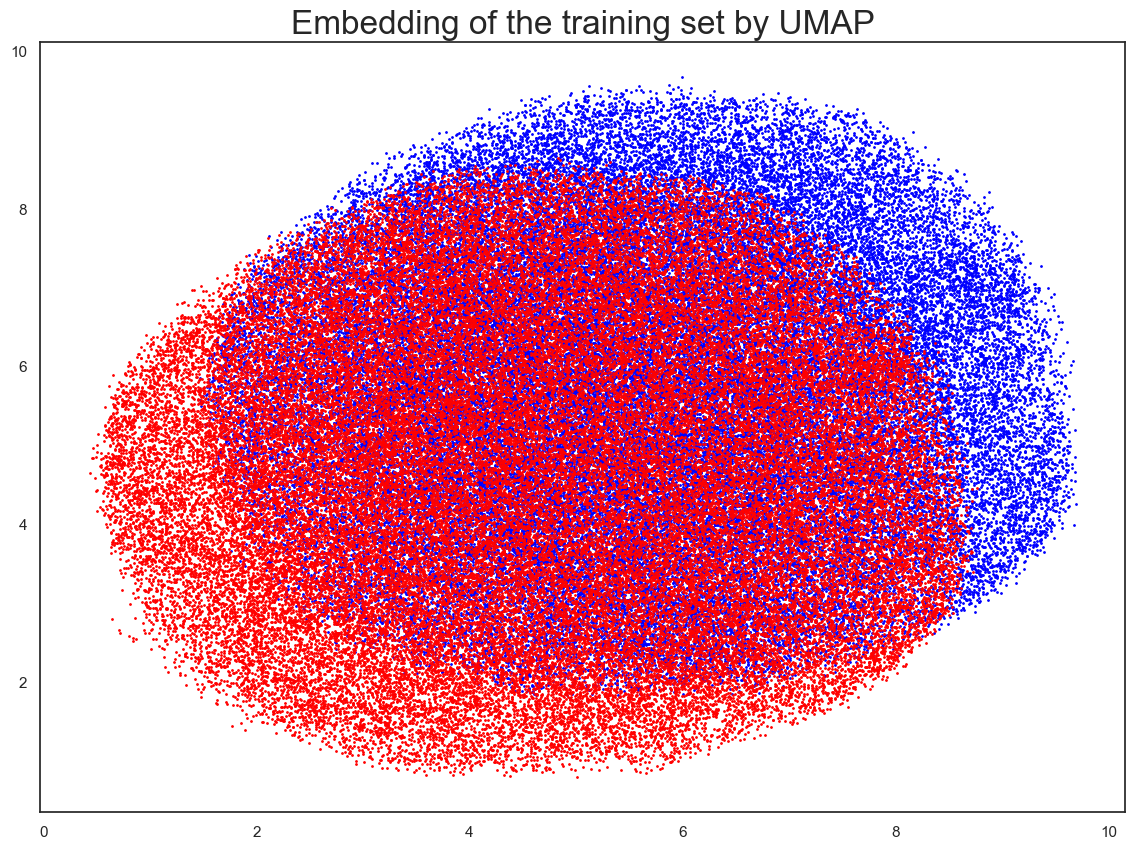

In [ ]:
#plt.scatter(trans.embedding_[sample_10k, 0], trans.embedding_[sample_10k, 1], s= 1, cmap='Spectral')

plt.scatter(trans.embedding_[327680:393216, 0], trans.embedding_[327680:393216, 1], color='blue', label='Set 1', s=1)

plt.scatter(trans.embedding_[458752:524288, 0], trans.embedding_[458752:524288, 1], color='red', label='Set 2', s=1)

plt.title('Embedding of the training set by UMAP', fontsize=24)

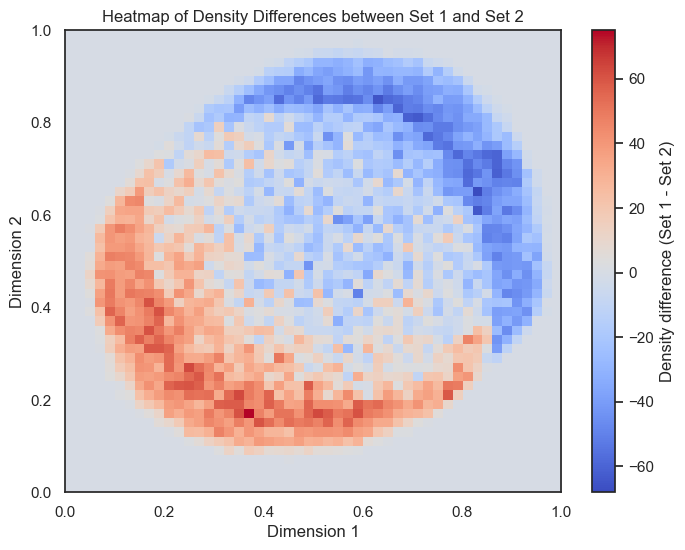

In [ ]:

# Extract points from two different epochs
points_set_1 = trans.embedding_[131072:196608]
points_set_2 = trans.embedding_[327680:393216]

# Define the grid for the 2D histogram
grid_size = 50  # Number of bins for the 2D histogram in each dimension

# Compute 2D histograms for both sets
hist_1, xedges, yedges = np.histogram2d(points_set_1[:, 0], points_set_1[:, 1], bins=grid_size, range=[[0, 10], [0, 10]])
hist_2, _, _ = np.histogram2d(points_set_2[:, 0], points_set_2[:, 1], bins=grid_size, range=[[0, 10], [0, 10]])

# Compute the difference between the histograms
hist_diff = hist_1 - hist_2

# Plot the difference as a heatmap
plt.figure(figsize=(8, 6))
plt.imshow(hist_diff.T, origin='lower', extent=[0, 1, 0, 1], cmap='coolwarm', aspect='auto')

# Add a colorbar
plt.colorbar(label='Density difference (Set 1 - Set 2)')

# Add labels and title
plt.title('Heatmap of Density Differences between Set 1 and Set 2')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')

# Show plot
plt.show()